In [1]:
"""
Read dataset file using pandas.
"""

from pandas import read_csv

dataset_path = "./dataset/spotify.csv"

df = read_csv(dataset_path)
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [32]:
from sklearn.preprocessing import StandardScaler

df2 = df.iloc[:1000, :].copy()

features_col = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

X = df2[features_col]
y = df2["id"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-0.27951532,  1.64009314,  0.08764747, ...,  0.7972357 ,
         0.07111581, -0.09587922],
       [ 0.55709089,  1.5595856 ,  1.3412764 , ..., -0.24496957,
         0.01644198, -0.5669431 ],
       [-1.28473984,  1.6094236 ,  4.54873983, ..., -0.4160779 ,
        -0.44828556,  0.95853434],
       ...,
       [-0.51298682,  1.58642145,  0.97160265, ...,  3.83051969,
        -0.82319181, -0.73873274],
       [-2.08243413,  1.52891607,  0.26487342, ...,  3.80459419,
        -0.63183341,  0.32276697],
       [ 0.26525151,  1.68226375,  0.89549335, ...,  3.46756264,
        -0.6630756 , -0.95469497]])

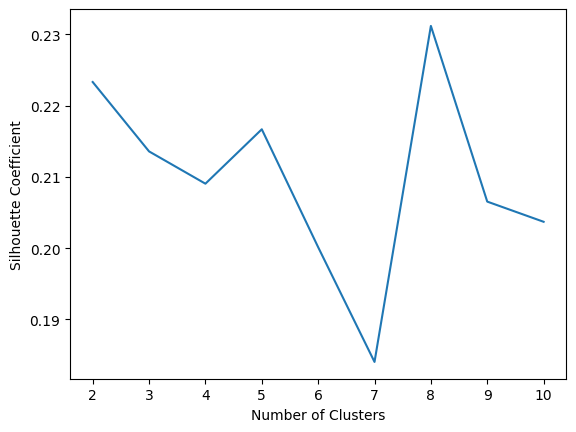

ValueError: Length of values (10) does not match length of index (1000)

In [34]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt

silhouette_coefficients = []

for i in range(2, 11):
	kmeans = KMeans(n_clusters=i, init="k-means++", n_init=1, random_state=0)
	kmeans.fit(X)
	
	score = silhouette_score(X, kmeans.labels_)
	silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

kmeans = KMeans(n_clusters=8, init="k-means++", n_init=1)
kmeans.fit(X[10:])

df2["cluster"] = kmeans.predict(X[:10])
df2.head()

# plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# plt.title("Optimal Number of Clusters")
# plt.show()

In [30]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=embedding)
projection['id'] = df2['id']
projection['cluster'] = df2['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'id'])
fig.show()